<a href="https://colab.research.google.com/github/mylethidiem/zero-to-hero/blob/main/preAIO25/AIOCodeMathDA/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[AIO2025] LẬP TRÌNH - TOÁN - DATA ANALYSIS \
[AIOCodeMathDA][Week6] \
LÊ THỊ DIỄM MY

# Day 26: Phân loại bệnh cúm bằng Naive Bayes


Naive Bayes là một thuật toán phân loại trong học máy, dựa trên định lý Bayes với giả định rằng các đặc trưng (features) là độc lập với nhau. Mặc dù giả định này thường không đúng trong thực tế, Naive Bayes vẫn hoạt động hiệu quả trong nhiều bài toán, đặc biệt là xử lý ngôn ngữ tự nhiên và phân loại văn bản.
Định lý Bayes được biểu diễn như sau:
$$
P(y|X) = \frac{P(X|y).P(y)}{P(X)}
$$
Trong đó: \
- $P(y∣X)$ là xác suất hậu nghiệm (posterior probability) của lớp y khi biết đặc trưng X \
- $P(X∣y)$ là xác suất của đặc trưng X khi biết lớp y

- $P(y)$ là xác suất tiền nghiệm (prior probability) của lớp y \
- $P(X)$ là xác suất của đặc trưng X

Giả định độc lập
Naive Bayes giả định rằng các đặc trưng là độc lập với nhau, nghĩa là: \
$$
P(X∣y)=P(x_1∣y)⋅P(x_2∣y)⋅…⋅P(x_n∣y)
$$

Các loại Naive Bayes \
1. Gaussian Naive Bayes: Sử dụng khi các đặc trưng liên tục và tuân theo phân phối chuẩn.
2. Multinomial Naive Bayes: Thường dùng cho dữ liệu phân loại, như phân loại văn bản với số lần xuất hiện của từ.
3. Bernoulli Naive Bayes: Phù hợp với dữ liệu nhị phân, như sự hiện diện hoặc vắng mặt của từ trong văn bản.


In [ ]:
import numpy as np
import pandas as pd

# Dữ liệu huấn luyện
# Tạo DataFrame chứa dữ liệu bệnh nhân
# Dữ liệu huấn luyện
data = pd.DataFrame({
  "Sốt": ["Cao", "Cao", "Cao", "Thấp", "Cao", "Thấp", "Thấp", "Cao", "Thấp", "Cao"],
  "Ho": ["Có", "Không", "Có", "Có", "Có", "Không", "Có", "Không", "Không", "Có"],
  "Đau họng": ["Có", "Có", "Không", "Có", "Có", "Có", "Không", "Có", "Không", "Có"],
  "Mệt mỏi": ["Có", "Không", "Có", "Có", "Không", "Không", "Có", "Có", "Không", "Có"],
  "Flu": ["Có", "Có", "Có", "Không", "Có", "Không", "Không", "Có", "Không", "Có"]
})

# Clean up spaces in the data
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.strip()

# Dữ liệu bệnh nhân cần dự đoán
new_patient = {"Sốt": "Cao", "Ho": "Có", "Đau họng": "Có", "Mệt mỏi": "Không"}

In [ ]:
# Tính xác suất tiên nghiệm P(C)
# Tính P(Flu = "Có") và P(Flu = "Không")
P_flu = data["Flu"].value_counts(normalize=True)["Có"]  # P(C=1)
P_not_flu = 1 - P_flu  # P(C=0)

print(f"P(Flu=Có) = {P_flu:.4f}")
print(f"P(Flu=Không) = {P_not_flu:.4f}")

P(Flu=Có) = 0.6000
P(Flu=Không) = 0.4000


In [ ]:
# Hàm tính xác suất có điều kiện P(x_i|C) với Laplace smoothing
def conditional_prob(feature, value, flu_status):
    # Lọc dữ liệu theo trạng thái flu
    subset = data[data["Flu"] == flu_status]

    # Đếm số lượng mẫu có feature=value trong subset
    count = subset[subset[feature] == value].shape[0]

    # Tổng số mẫu trong subset
    total = subset.shape[0]

    # Số giá trị khác nhau của feature
    n_values = len(data[feature].unique())

    # Áp dụng Laplace smoothing
    return (count + 1) / (total + n_values)

# Tính P(X|C) = P(x_1|C) * P(x_2|C) * ... * P(x_n|C) theo Naive Bayes
P_X_given_flu = 1.0  # P(X|C=1)
P_X_given_not_flu = 1.0  # P(X|C=0)
for feature, value in new_patient.items() :
  value = value.strip()  # Clean up any spaces
  p_feature_given_flu = conditional_prob(feature, value, "Có")
  p_feature_given_not_flu = conditional_prob(feature, value, "Không")

  print(f"P({feature}={value}|Flu=Có) = {p_feature_given_flu:.4f}")
  print(f"P({feature}={value}|Flu=Không) = {p_feature_given_not_flu:.4f}")

  P_X_given_flu *= p_feature_given_flu
  P_X_given_not_flu *= p_feature_given_not_flu

print(f"\nP(X|Flu=Có) = {P_X_given_flu:.4f}")
print(f"P(X|Flu=Không) = {P_X_given_not_flu:.4f}")

P(Sốt=Cao|Flu=Có) = 0.8750
P(Sốt=Cao|Flu=Không) = 0.1667
P(Ho=Có|Flu=Có) = 0.6250
P(Ho=Có|Flu=Không) = 0.5000
P(Đau họng=Có|Flu=Có) = 0.7500
P(Đau họng=Có|Flu=Không) = 0.5000
P(Mệt mỏi=Không|Flu=Có) = 0.3750
P(Mệt mỏi=Không|Flu=Không) = 0.5000

P(X|Flu=Có) = 0.1538
P(X|Flu=Không) = 0.0208


In [ ]:
# Tính P(C|X) trực tiếp từ tỷ lệ (không cần P(X))
numerator_flu = P_X_given_flu * P_flu
numerator_not_flu = P_X_given_not_flu * P_not_flu

print(f"\nP(X|Flu=Có) * P(Flu=Có) = {numerator_flu:.4f}")
print(f"P(X|Flu=Không) * P(Flu=Không) = {numerator_not_flu:.4f}")


P(X|Flu=Có) * P(Flu=Có) = 0.0923
P(X|Flu=Không) * P(Flu=Không) = 0.0083


In [ ]:
# Chuẩn hóa xác suất
total = numerator_flu + numerator_not_flu
P_flu_given_X = numerator_flu / total
P_not_flu_given_X = numerator_not_flu / total

print("\nKết quả Naive Bayes:")
print(f"P(Flu=Có|X) = {P_flu_given_X:.4f}")
print(f"P(Flu=Không|X) = {P_not_flu_given_X:.4f}")

# Kết luận
print("\nKết luận:", "Bệnh nhân có khả năng bị cúm." if P_flu_given_X > P_not_flu_given_X else "Bệnh nhân KHÔNG có khả năng bị cúm.")


Kết quả Naive Bayes:
P(Flu=Có|X) = 0.9172
P(Flu=Không|X) = 0.0828

Kết luận: Bệnh nhân có khả năng bị cúm.


# Day 27: Data Analysis with Visualization
- [PygWalker](https://github.com/Kanaries/pygwalker)
- [Doc](https://docs.kanaries.net/pygwalker)

In [ ]:
!pip install pygwalker # Similar in Jupyter Notebook, we also install pandas

Câu 1: Vẽ biểu đồ phân phối dữ liệu cho 3 loại: TV, Radio, Paper và được Color
theo độ lớn của giá bán (Sales).

In [ ]:
import pygwalker as pyg
import pandas as pd

data = pd.read_csv("advertising.csv")
pyg.walk(data)

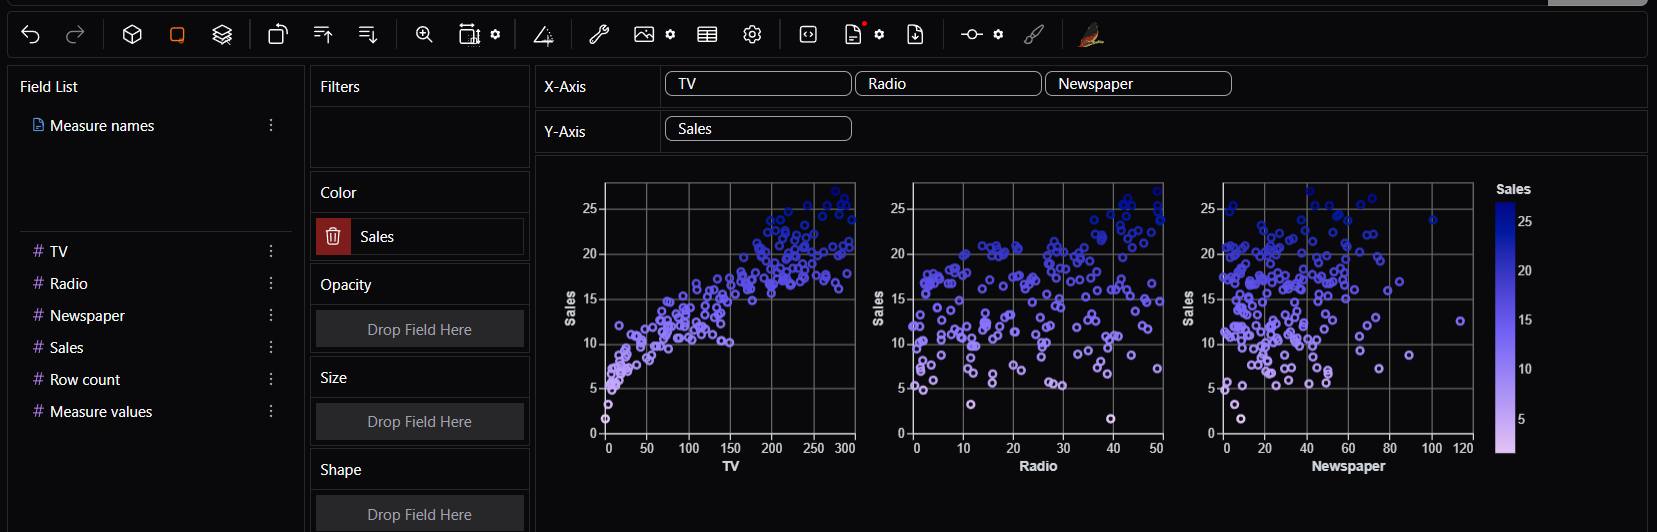

Câu 2: Vẽ biểu đồ cột thể hiện doanh số bán (Sales) ⩾ 10 của cả 3 loại TV, Radio và Newspaper.

In [ ]:
import pygwalker as pyg
import pandas as pd


# Đọc dữ liệu (Giả sử bạn có DataFrame 'df' với các cột: 'TV', 'Radio', 'Newspaper', 'Sales')
data = pd.read_csv("advertising.csv")

# Lọc dữ liệu chỉ lấy những hàng có Sales >= 10
filtered_df = data[data["Sales"] >= 10]

# Hiển thị biểu đồ trực quan bằng pygwalker
pyg.walk(filtered_df)

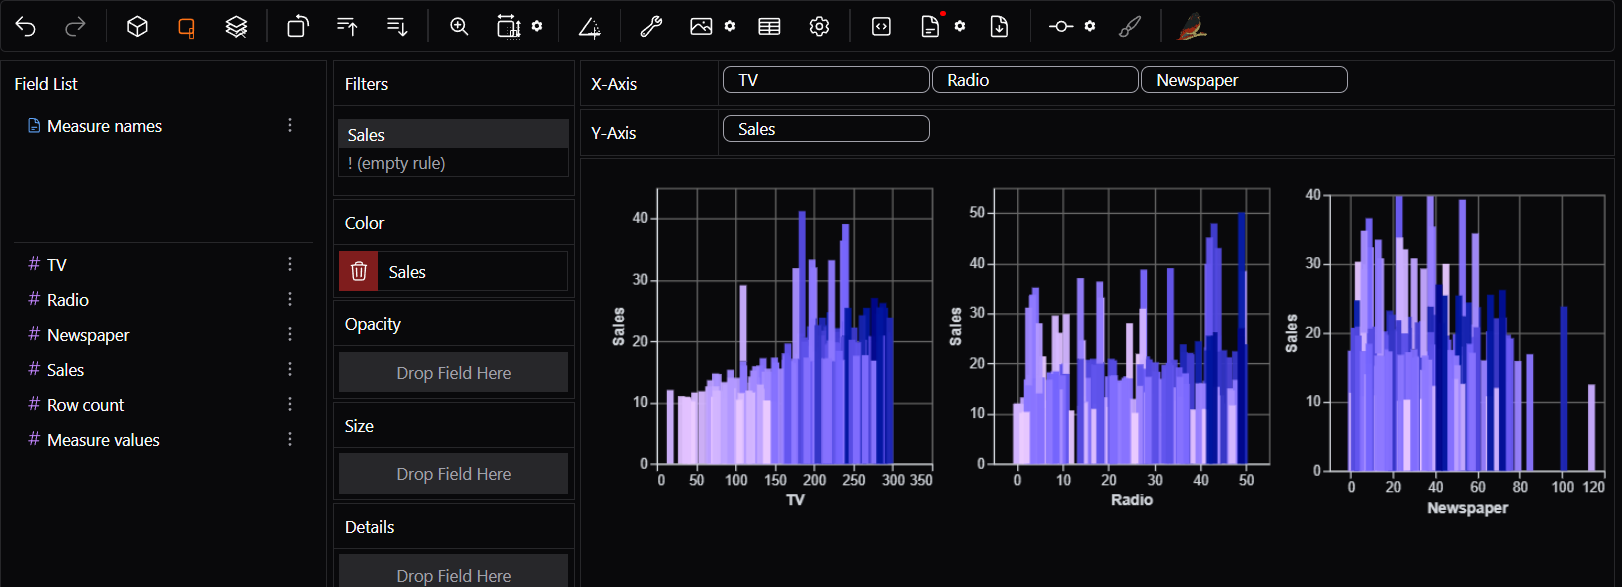

Câu 3: Hãy vẽ bản đồ biểu diễn phân bố dân số theo thành phố của các nước thuộc các nước: Việt Nam, Hàn Quốc, Nhật Bản, Singapore và Thái Lan dựa theo dữ liệu sau: Dữ liệu dân số thế giới

lat (Latitude) và lng (Longitude) là vĩ độ và kinh độ, dùng để xác định vị trí trên bản đồ:

📍 lat (Vĩ độ - Latitude):

- Chỉ vị trí theo chiều Bắc - Nam trên Trái Đất.
- Giá trị từ -90° đến 90° (âm là Nam, dương là Bắc).
- Ví dụ: Hà Nội có lat ≈ 21.0285.

📍 lng (Kinh độ - Longitude): \
- Chỉ vị trí theo chiều Đông - Tây.
- Giá trị từ -180° đến 180° (âm là Tây, dương là Đông).
- Ví dụ: Hà Nội có lng ≈ 105.8544.

🚀 Ví dụ thực tế
- Hà Nội: (lat=21.0285, lng=105.8544)
- Tokyo: (lat=35.682839, lng=139.759455)

Dùng lat/lng vẽ bản đồ giúp xác định chính xác vị trí của các thành phố! 🌍📌

In [ ]:
import pandas as pd
import pygwalker as pyg
import requests
from IPython.display import display

# 1️ Tải dữ liệu dân số thế giới từ nguồn mở
url = "https://simplemaps.com/static/data/world-cities/basic/simplemaps_worldcities_basicv1.75.zip"
r = requests.get(url)

# Lưu file ZIP và giải nén
with open("world_cities.zip", "wb") as f:
    f.write(r.content)

import zipfile

with zipfile.ZipFile("world_cities.zip", "r") as zip_ref:
    zip_ref.extractall("world_cities")

# Đọc dữ liệu từ file CSV
df = pd.read_csv("world_cities/worldcities.csv")

# 2️ Lọc dữ liệu cho các quốc gia mục tiêu
countries = ["Vietnam", "South Korea", "Japan", "Singapore", "Thailand"]
filtered_df = df[df["country"].isin(countries)][["city", "lat", "lng", "population", "country"]]

# 3 Vẽ bản đồ với Pygwalker
pyg_html = pyg.walk(filtered_df)
display(pyg_html)


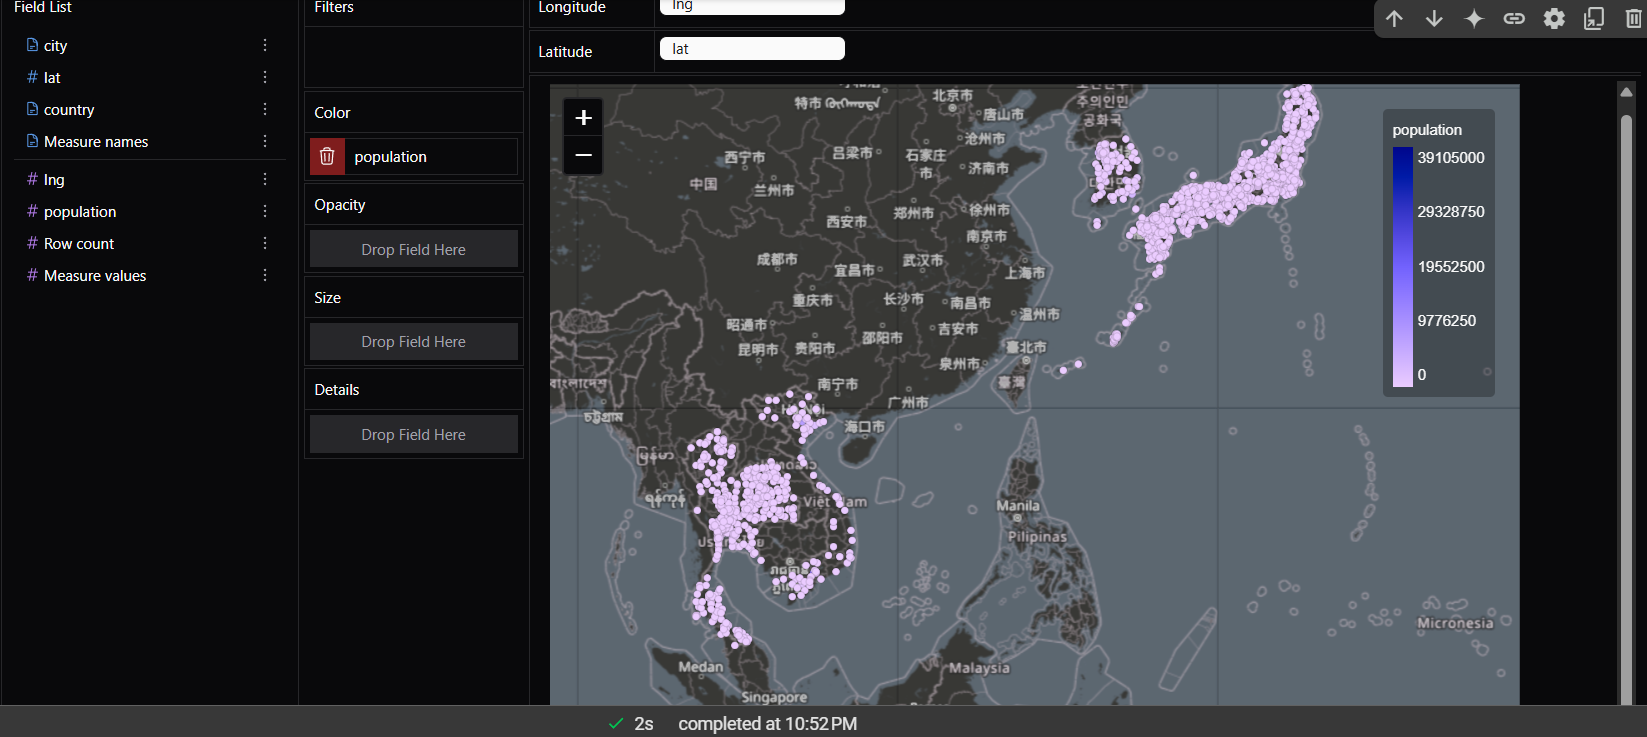

# Day 28: Đạo hàm và phương pháp sai phân hữu hạn


Tốc độ thay đổi của hàm số tại một điểm. Ứng dụng:
- Tìm cực trị của hàm số.
- Tính toán độ dốc của đồ thị hàm số.
- Giải quyết các bài toán tối ưu hóa trong khoa học dữ liệu và học máy.

Phương pháp sai phân hữu hạn \
Trong lập trình, ta không thể tính giới hạn khi h → 0, do đó ta xấp xỉ đạo hàm bằng phương pháp sai phân hữu hạn

$$
f'(x) ≈ \frac{f(x+h)-f(x)}{h} \\
h= 10^{-5}
$$


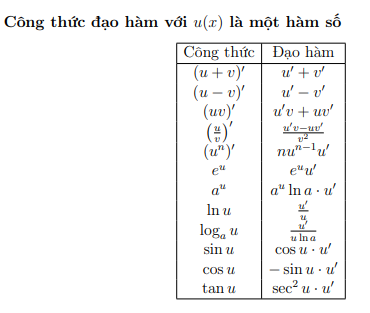

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Hàm tính đạo hàm bằng sai phân hữu hạn
def forward_diff(f, x, h=1e-5):
    """Sai phân tiến"""
    return (f(x + h) - f(x)) / h

def backward_diff(f, x, h=1e-5):
    """Sai phân lùi"""
    return (f(x) - f(x - h)) / h

def central_diff(f, x, h=1e-5):
    """Sai phân trung tâm"""
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=1e-5):
    """Đạo hàm bậc hai sử dụng sai phân trung tâm"""
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h ** 2)


def plot_function_and_derivative(f, x_range =(-6, 6), title ="Đồ thị f(x) và f'(x)"):
  x_vals = np.linspace(x_range[0], x_range [1], 400)
  y_vals = f(x_vals)
  y_derivative_vals = forward_diff(f, x_vals)

  plt.figure(figsize =(8 , 5) )
  plt.plot(x_vals, y_vals , label ="f(x)", color ='blue')
  plt.plot(x_vals, y_derivative_vals , label ="f'(x)(numerical)", color ='red', linestyle ="--")
  plt.axhline(0, color='black', linewidth =0.5, linestyle ='--')
  plt.axvline(0, color='black', linewidth =0.5, linestyle ='--')
  plt.xlabel("x")
  plt.ylabel("f(x) & f'(x)")
  plt.title(title)
  plt.legend()
  plt.grid()
  plt.show()

In [9]:
def f1(x):
  return x**2 - 3*x +2

def f2(x):
  return x**3 - 3**x + 4*x-2

def f3(x):
  return np.exp(x)

def f4(x):
  return np.log(x) #log of 2

def f5(x):
  return np.sin(x)

def f6(x):
  return np.cos(x)

def f7(x):
  return np.tan(x)

def f8(x):
  return np.sqrt(x)

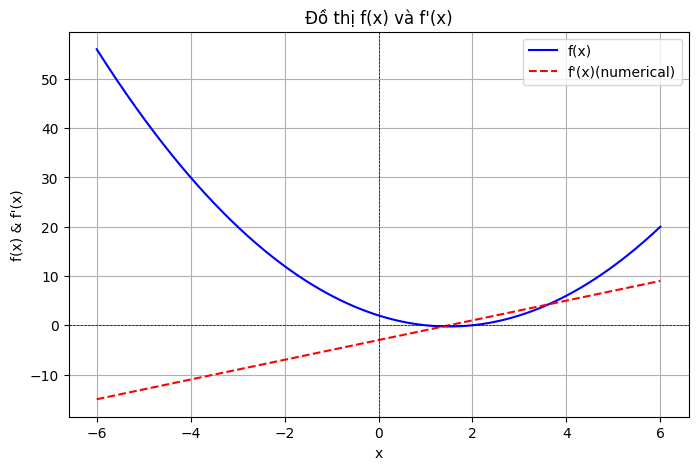

In [10]:
plot_function_and_derivative(f1)

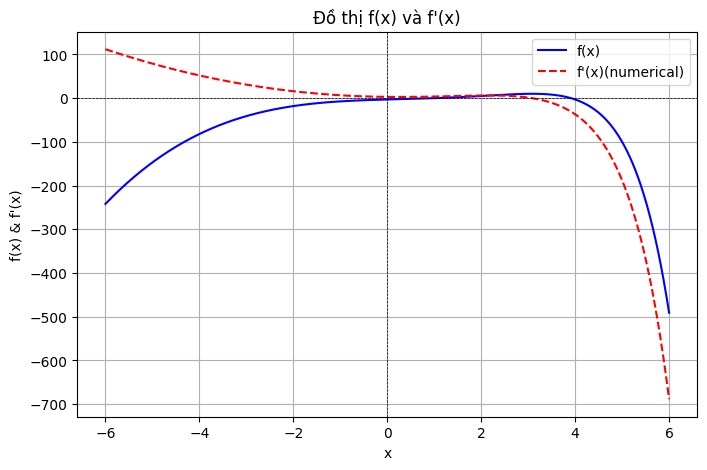

In [11]:
plot_function_and_derivative(f2)

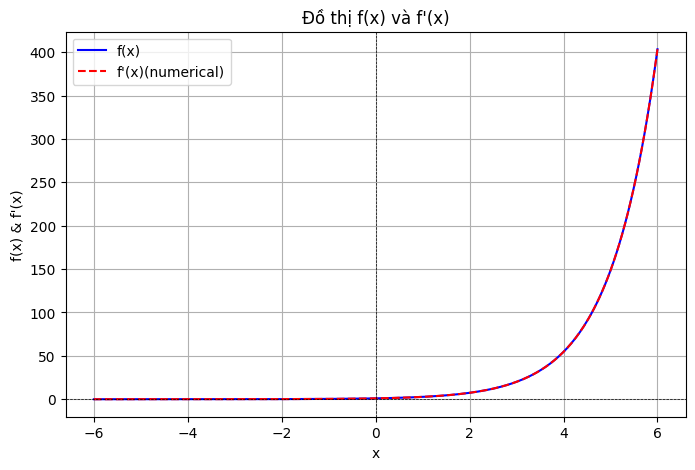

In [12]:
plot_function_and_derivative(f3)

<ipython-input-9-733b72ee70a2>:11: RuntimeWarning: invalid value encountered in log
  return np.log(x) #log of 2


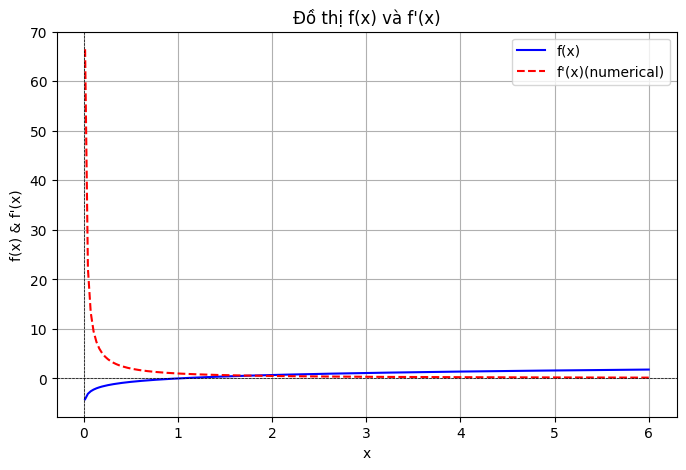

In [13]:
plot_function_and_derivative(f4)

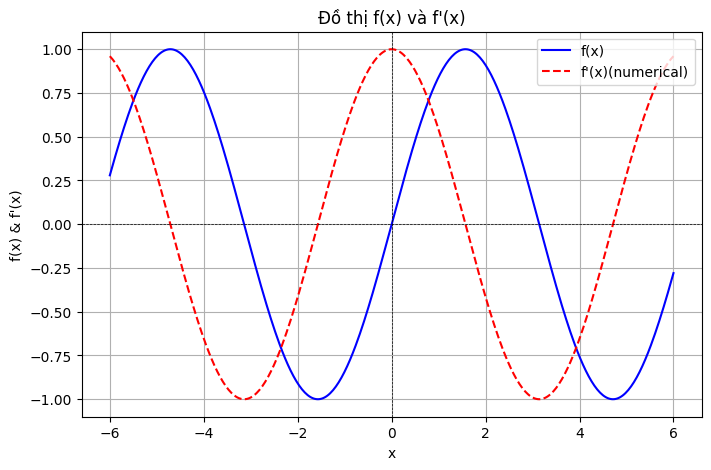

In [14]:
plot_function_and_derivative(f5)

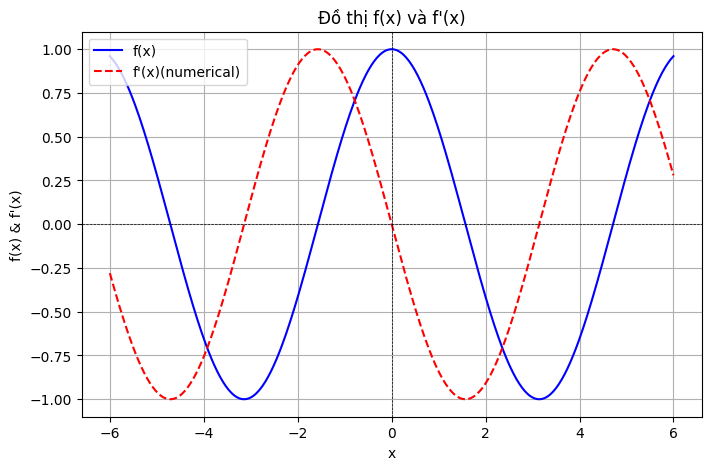

In [15]:
plot_function_and_derivative(f6)

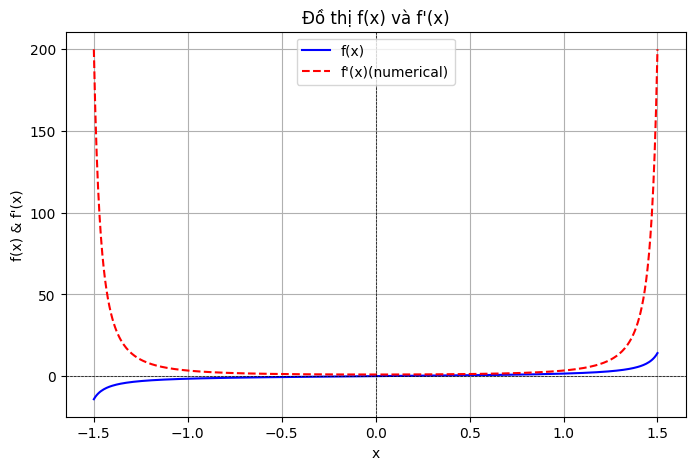

In [16]:
plot_function_and_derivative(f7, x_range =(-1.5, 1.5))

<ipython-input-9-733b72ee70a2>:23: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x)


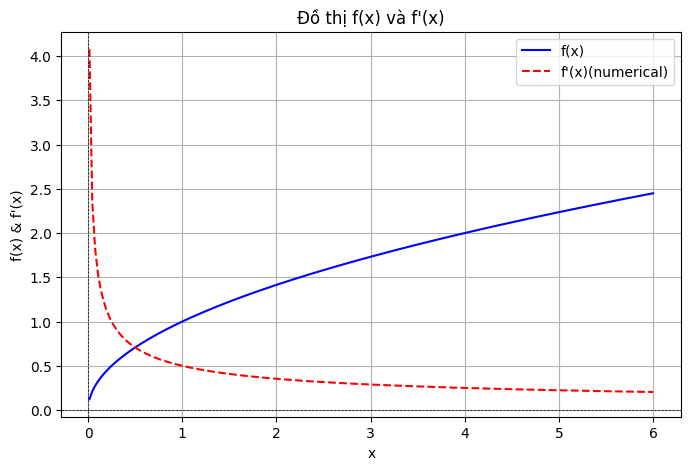

In [17]:
plot_function_and_derivative(f8)

# Day 29: Đạo hàm của hàm hợp


Hai hàm số $u=g(x)$ và $y=f(u)$, khi đó $y$ là một hàm hợp của $x$:
$$
y=f(g(x))
$$

Đạo hàm của $y$ theo $x$ đc tính theo công thức:
$$
\frac{d}{dx}f(g(x)) = f'(g(x)) · g'(x)
$$

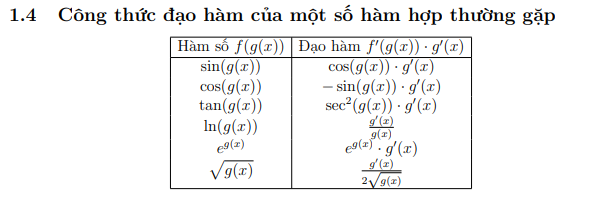

Kiểm tra lại bằng cách lập trình Python sử dụng phương pháp sai phân hữu hạn.


### Bài 5: Đạo hàm của hàm hợp có nhiều lớp
$$
f(x)=e^{ln(x^2+4)} \\
g(x) = x^2 + 4
$$

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm tính đạo hàm bằng sai phân hữu hạn
def numerical_derivative (f, x, h=1e-5):#forward
  return (f(x + h) - f(x)) / h

# Hàm vẽ đồ thị của hàm số và đạo hàm
def plot_chain_rule(f, g, x_range=(-2, 2), title="Đạo hàm Chain Rule"):
  x_vals = np.linspace(x_range[0], x_range[1], 400)

  # Tính giá trị của g(x) và f(g(x))
  g_vals = g(x_vals)
  f_vals = f(g_vals)

  # Tính đạo hàm theo Chain Rule
  # Đạo hàm của hàm bên ngoài f'(g(x))
  df_vals = np.array([numerical_derivative(f, g_x) for g_x in  g_vals])

  # Đạo hàm của hàm bên trong g'(x)
  dg_vals = np.array([numerical_derivative(g, x) for x in f_vals])

  # Áp dụng chain rule: f'(g(x)) * g'(x)
  chain_rule_derivative_vals = df_vals * dg_vals

  # Vẽ đồ thị của f(g(x)) và đạo hàm
  plt.figure(figsize=(8, 5))
  plt.plot(x_vals, f_vals , label ="f(g(x))", color ='blue')
  plt.plot(x_vals, chain_rule_derivative_vals, label ="f'(x) theo Chain rule ", color ='red', linestyle="--")

  plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
  plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

  plt.xlabel("x")
  plt.ylabel("Giá trị")
  plt.title(title)
  plt.legend()
  plt.grid()
  plt.show()


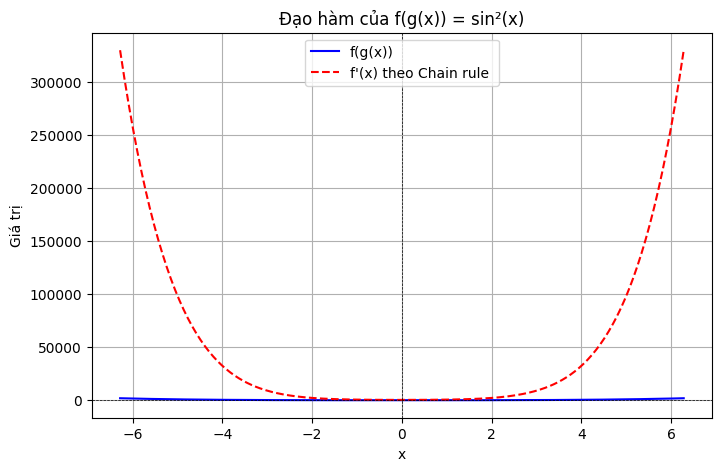

In [19]:
f = lambda x: np.exp(np.log(x**2 + 4))
g = lambda x: x**2 + 4

plot_chain_rule(f, g, x_range=(-2*np.pi, 2*np.pi), title="Đạo hàm của f(g(x)) = sin²(x)")

# Day 30: Giải tích trong AI


Ứng dụng của giải tích trong AI:
- Tối ưu hóa mô hình bằng Gradient Descent.
- Tính đạo hàm để cập nhật tham số trong học sâu.
- Tính đạo hàm riêng để huấn luyện mạng nơ-ron bằng thuật toán Backpropagation.
- Tích phân trong xác suất và thống kê (phân bố xác suất).

Đạo hàm trong học máy: \
Đạo hàm đo lường tốc độ thay đổi của hàm số. Trong AI, đạo hàm được sử dụng để điều chỉnh tham số của mô hình để giảm lôi dự đoán.
$$
f'(x)=\lim_{h \to 0}{\frac{f(x+h)-f(x)}{h}}
$$


Gradient Descent là thuật toán tối ưu hóa quan trọng giúp cập nhật tham số của mô hình dựa trên gradient của hàm mất mát. Công thức cập nhật tham số:
$$
\theta_{t+1}=\theta_t-\alpha \nabla J(\theta)
$$
Trong đó:
+ α là learning rate
+ ∇J(θ) là gradient của hàm mất mát

Đạo hàm của hàm hợp trong học sâu \
Trong mạng nơ-ron nhân tạo (Neural Network), đầu ra của một lớp là đầu vào của lớp tiếp
theo. Khi huấn luyện mô hình, ta cần tính toán đạo hàm của hàm hợp nhiều lớp.

Thuật toán Backpropagation - Lan truyền ngược \
Backpropagation sử dụng Chain Rule để tính gradient từ đầu ra về lại các lớp trước để cập
nhật trọng số.

### Bài 1: Đạo Hàm của Hàm Kích Hoạt Sigmoid

$$
\sigma(x)=\frac{1}{1+e^{-x}}
$$
Đạo hàm: \
$$
\sigma'(x)=\sigma(x)(1-\sigma(x))
$$

In [20]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x) :
  return sigmoid(x) * (1 - sigmoid(x))

x = np.array([-2, -1, 0, 1, 2])
print("Sigmoid :", sigmoid(x))
print("Sigmoid derivative :", sigmoid_derivative(x))

Sigmoid : [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Sigmoid derivative : [0.10499359 0.19661193 0.25       0.19661193 0.10499359]


### Bài 2: Đạo Hàm của Hàm Tổn Thất MSE

$$
L(y,\hat{y})=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2
$$

Đạo hàm: \
$$
\frac{\partial L}{\partial \hat{y_i}}=-\frac{2}{n}(y_i-\hat{y_i})
$$

In [21]:
def mse_derivative(y_true, y_pred):
  return (1 / len(y_true)) *  np.sum(y_true - y_pred)

y_true = np.array([3, 5, 2, 8])
y_pred = np.array([2.5, 4.8, 2.1, 7.5])
print("Gradient của MSE :", mse_derivative(y_true, y_pred))

Gradient của MSE : 0.275


### Bài 3: Đạo Hàm của Hàm Kích Hoạt ReLU

$$
ReLU(x) = max(0, x)
$$
Đào hàm: \
$$
ReLU(x) = \left\{ \begin{array}{cl}
1 & : \ x > 0 \\
0 & : \ x \leq 0
\end{array} \right.
$$

In [22]:
def relu(x):
  return np.where(x > 0, x, 0)

def relu_derivative(x):
  return np.where(x > 0, 1, 0)

x = np.array([-2, -1, 0, 1, 2])
print("ReLU :", relu(x))
print("ReLU derivative :", relu_derivative(x))

ReLU : [0 0 0 1 2]
ReLU derivative : [0 0 0 1 1]


### Bài 4: Đạo Hàm của Hàm Softmax và Cross-Entropy


$$
\sigma(z)_i=\frac{e^{z_i}}{\sum_{\substack{n}}e^{z_j}}
$$
Đào hàm: \
$$
\frac{\partial \sigma_i}{\partial z_j}=\sigma_i(1-\sigma_i)
$$

In [23]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

def softmax_derivative(x):
  return softmax(x) * (1 - softmax(x))

x = np.array([-2, -1, 0, 1, 2])
print("Softmax :", relu(x))
print("Softmax derivative :", softmax_derivative(x))

Softmax : [0 0 0 1 2]
Softmax derivative : [0.01152036 0.03068099 0.07871042 0.17930871 0.23139268]


### Bài 5: Đạo Hàm của Hàm Kích Hoạt Tanh

$$
tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
$$
Đào hàm: \
$$
tanh(x) = 1-tanh^2(x)
$$

In [24]:
def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_derivative(x):
  return 1- tanh(x)**2

x = np.array([-2, -1, 0, 1, 2])
print("Tanh :", relu(x))
print("Tanh derivative :", tanh_derivative(x))

Tanh : [0 0 0 1 2]
Tanh derivative : [0.07065082 0.41997434 1.         0.41997434 0.07065082]
